## ARMA Residual Diagnostics

**Functions**

`tsa.SARIMAX`, `sm.stats.diagnostic.acorr_ljungbox`, `SARIMAXResults.test_serial_correlation`,
`statsmodels.sandbox.stats.diagnostic.acorr_lm`

### Exercise 45
Compute the residuals from your preferred model from the previous exercise, as well as a random-walk model.

1. Plot the residuals
2. Is there evidence of autocorrelation in the residuals?
3. Compute the Q statistic from both sets of residuals. Is there evidence of serial correlation?
4. Compute the LM test for serial correlation. Is there evidence of serial correlation?

In [1]:
import statsmodels.tsa.api as tsa
import pandas as pd

data = pd.read_hdf("data/term-premium.h5", "term_premium")
term = data["TERM"]

mod = tsa.SARIMAX(term, order=(1,0,1), trend="c")
res = mod.fit()

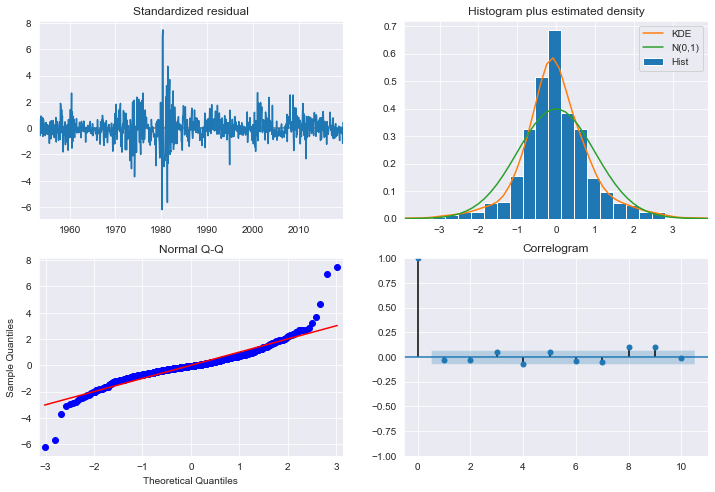

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rc("figure", figsize=(12,8))
sns.set_style("darkgrid")

plt.rc("hist", bins=41)
fig = res.plot_diagnostics()

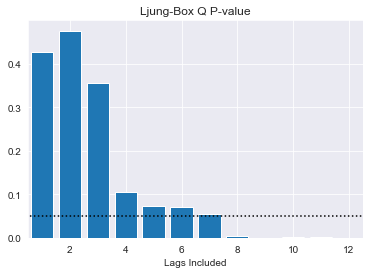

In [3]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

resid = res.resid
stat, pval = acorr_ljungbox(resid, lags=12)
plt.bar(np.arange(1, 13), pval)
plt.plot([0,13],[0.05,0.05], linestyle=":", color="black")
ax = plt.gca()
ax.set_title("Ljung-Box Q P-value")
ax.set_xlabel("Lags Included")
lim = ax.set_xlim(0.5,12.5)

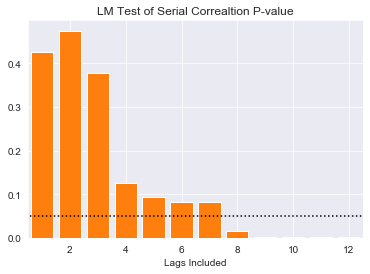

In [4]:
from statsmodels.sandbox.stats.diagnostic import acorr_lm

colors = sns.color_palette()
pval = {}
for i in range(1, 13):
    stat, pv, _, _ = acorr_lm(resid, i, None)
    pval[i] = pv
pval = pd.Series(pval)    
plt.bar(np.arange(1, 13), pval, color=colors[1])
plt.plot([0,13],[0.05,0.05], linestyle=":", color="black")
ax = plt.gca()
ax.set_title("LM Test of Serial Correaltion P-value")
ax.set_xlabel("Lags Included")
lim = ax.set_xlim(0.5,12.5)    